In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Read the CSV file
df = pd.read_csv("arecanut.csv")



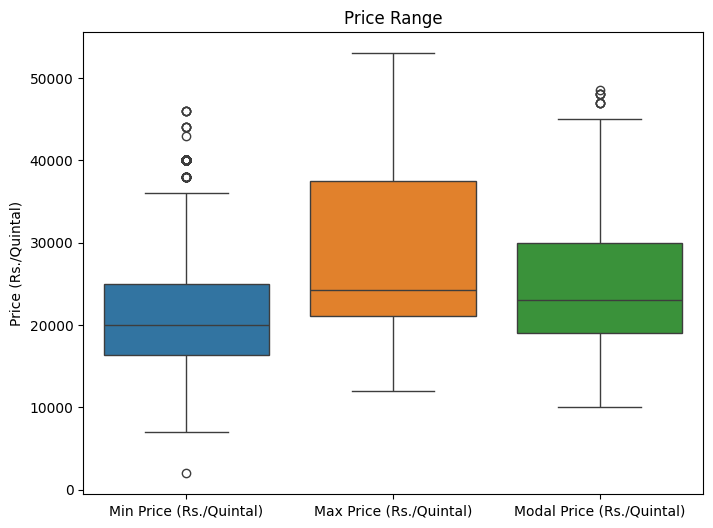

In [11]:
#Visualize the range of prices using a box plot:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)', 'Modal Price (Rs./Quintal)']])
plt.ylabel('Price (Rs./Quintal)')
plt.title('Price Range')
plt.show()


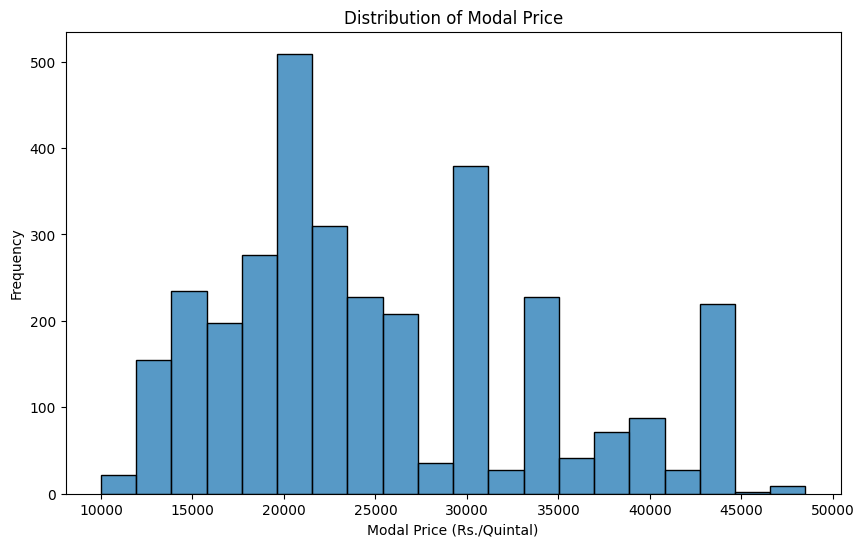

In [12]:
# Visualize the distribution of the target variable ("Modal Price (Rs./Quintal)"):


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Modal Price (Rs./Quintal)', bins=20)
plt.xlabel('Modal Price (Rs./Quintal)')
plt.ylabel('Frequency')
plt.title('Distribution of Modal Price')
plt.show()


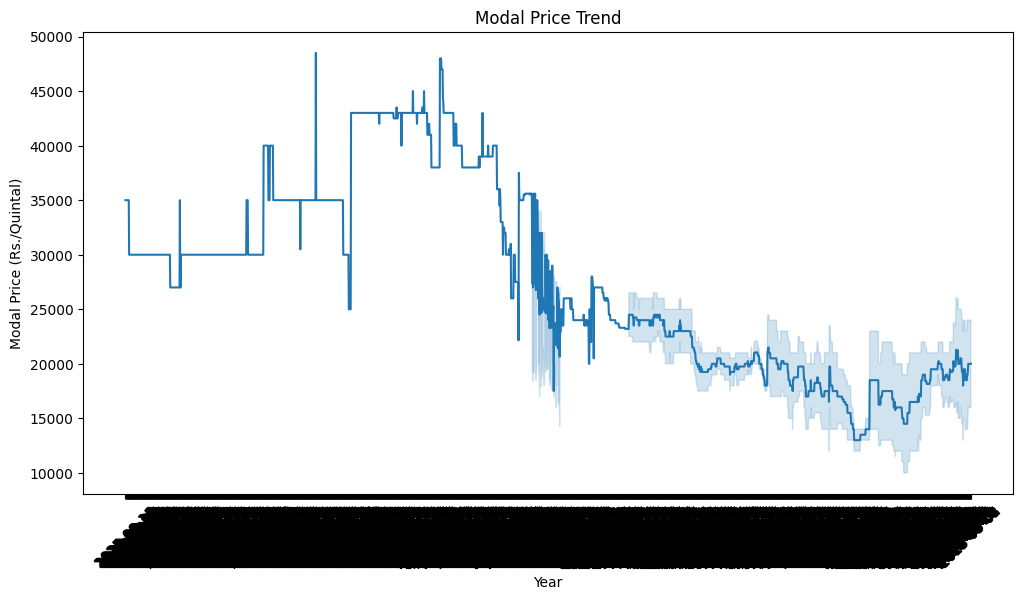

In [13]:
#Plot the trend of the modal price over time:

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Price Date', y='Modal Price (Rs./Quintal)')
plt.xlabel('Year')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Modal Price Trend')
plt.xticks(rotation=45)
plt.show()


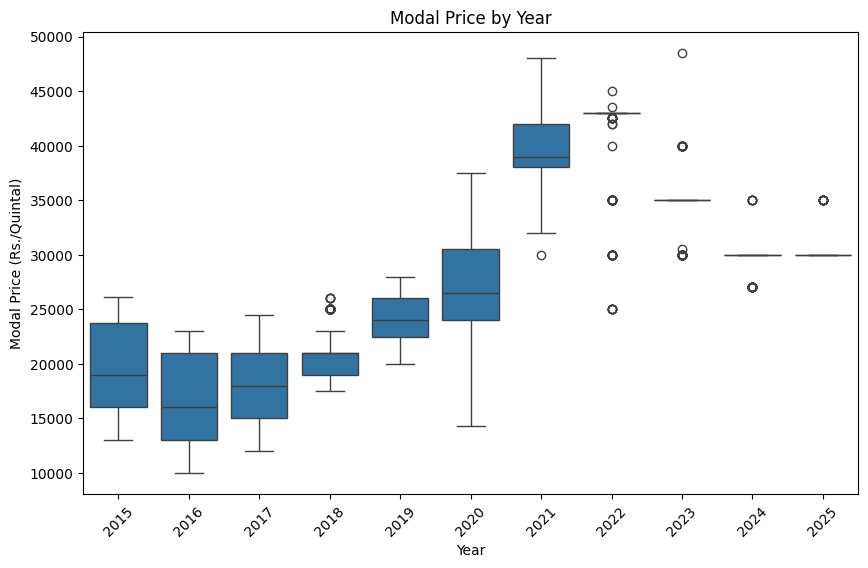

In [14]:
#Visualize the relationship between the modal price and the year:
df['Price Date'] = pd.to_datetime(df['Price Date'])
df['Year'] = df['Price Date'].dt.year

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Year', y='Modal Price (Rs./Quintal)')
plt.xlabel('Year')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Modal Price by Year')
plt.xticks(rotation=45)
plt.show()


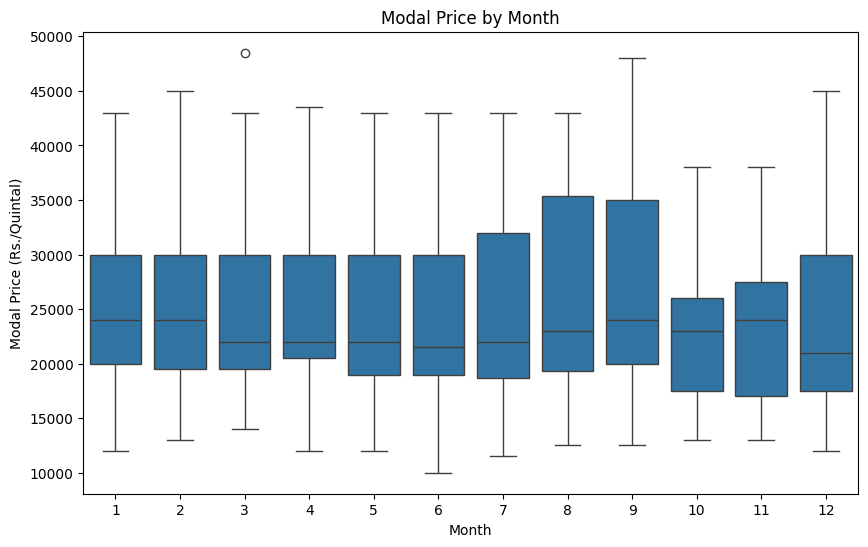

In [15]:
#Visualize the relationship between the modal price and the month:

df['Month'] = df['Price Date'].dt.month

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Month', y='Modal Price (Rs./Quintal)')
plt.xlabel('Month')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Modal Price by Month')
plt.show()


In [16]:

# Preprocess the data
df['Price Date'] = pd.to_datetime(df['Price Date'])
df['Year'] = df['Price Date'].dt.year
df['Month'] = df['Price Date'].dt.month
df = df[['Year', 'Month', 'Modal Price (Rs./Quintal)']]

In [17]:
# Split into features and target
X = df[['Year', 'Month']]
y = df['Modal Price (Rs./Quintal)']


In [18]:
# Scale the features and target
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(np.array(y).reshape(-1, 1))

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [20]:
# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [21]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(1, X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

c:\Users\shett\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0848
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0295
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0225
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0214
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0211
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0207
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0202
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0198
Epoch 9/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0194
Epoch 10/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0188
Epoch 11/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0183
Epoch 12/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0177
Epoch 13/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0166
Epoch 14/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0155
Epoch 15/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0141
Epoc

In [23]:
# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.006997188087552786


In [24]:
# Make predictions
predictions1 = model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [25]:
# Inverse transform the scaled predictions
predictions2 = scaler.inverse_transform(predictions1)

In [26]:
for i in range(len(y_test)):
    print('Actual:', scaler.inverse_transform(y_test[i].reshape(-1, 1))[0][0])
    print('Predicted:', predictions2[i][0])
    print()

Actual: 21000.0
Predicted: 17307.395

Actual: 27000.0
Predicted: 26311.293

Actual: 35000.0
Predicted: 36714.016

Actual: 30000.0
Predicted: 32753.203

Actual: 21000.0
Predicted: 17024.12

Actual: 24000.0
Predicted: 24351.422

Actual: 22999.999999999996
Predicted: 25126.844

Actual: 26500.0
Predicted: 23264.969

Actual: 35000.0
Predicted: 37108.43

Actual: 30000.0
Predicted: 32842.22

Actual: 19000.0
Predicted: 19646.336

Actual: 26000.0
Predicted: 22207.682

Actual: 26000.0
Predicted: 30363.967

Actual: 24000.0
Predicted: 24351.422

Actual: 38000.0
Predicted: 37904.824

Actual: 43500.0
Predicted: 39671.145

Actual: 14000.0
Predicted: 17286.94

Actual: 19000.0
Predicted: 19078.393

Actual: 21000.0
Predicted: 19646.336

Actual: 30000.0
Predicted: 32884.098

Actual: 19500.0
Predicted: 18909.65

Actual: 35000.0
Predicted: 36440.105

Actual: 27000.0
Predicted: 28263.703

Actual: 21000.0
Predicted: 17335.316

Actual: 43000.0
Predicted: 40755.004

Actual: 26500.0
Predicted: 22207.682

Actual

In [27]:
#Calculate and print the Mean Absolute Error (MAE):

from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Absolute Error: 0.06797992825547888


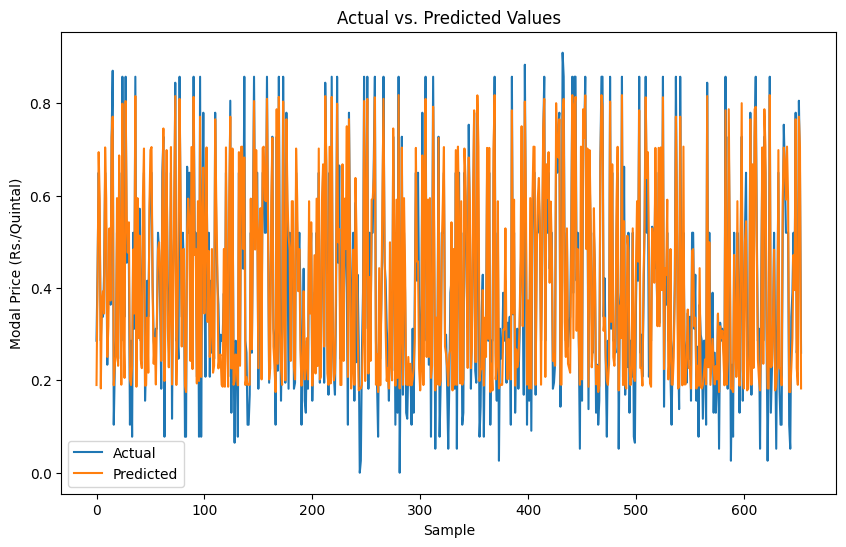

In [28]:
#Plot the actual vs. predicted values:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


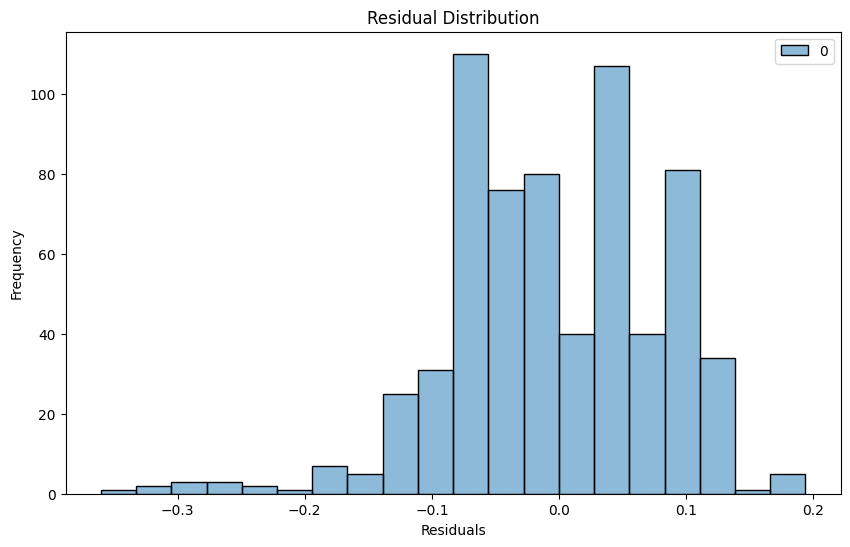

In [29]:

#Plot the residual distribution:
residuals = y_test - predictions

plt.figure(figsize=(10, 6))
sns.histplot(data=residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()


In [30]:
#Calculate and print the Coefficient of Determination (R-squared):
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print('R-squared:', r2)


R-squared: 0.8544143322405746
